      Voltage    Current  AmbientTemp       Load  RunningTime   TempRise
0  218.727006  11.420316    21.546858  58.446753    87.796250  45.346533
1  247.535715   5.841400    33.538294  63.929517    26.779295  42.769695
2  236.599697   6.616287    27.578786  58.850524    73.391720  45.453154
3  229.932924  13.985542    32.396862  54.435127    76.738655  54.159587
4  207.800932  11.064291    24.800744  56.031794    56.654374  44.810492

Model Coefficients: [0.03192648 0.79741846 0.65062721 0.09522512 0.0666346 ]
Intercept: 3.472388797806296
R² Score: 0.8437600885956079
MAE: 1.3580057699615116
RMSE: 1.7709620403197135


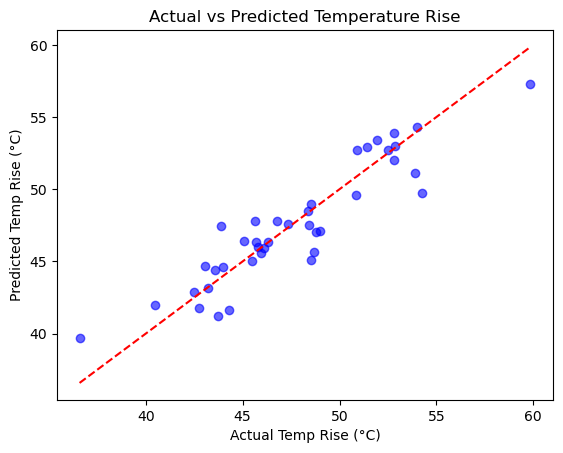


Predicted Temperature Rise for new data: 49.92456710861345 °C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (                               #true value finding formula
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)

df = pd.DataFrame({
    "Voltage": voltage,         #features
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise        #output y
})

print(df.head())    #prints first 5 lines of dataframe

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #20% data in test set

# ---------------------------
# Step 3: Train Regression Model
# ---------------------------
model = LinearRegression()   #instantiate
model.fit(X_train, y_train)  #function fit takes training data as input , estimate parameters based on the data

# ---------------------------
# Step 4: Predictions & Evaluation
# ---------------------------
y_pred = model.predict(X_test) #predict function takes x as input

print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))  #actual value and predicted values
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Actual vs Predicted Temperature Rise")
plt.show()

# ---------------------------
# Step 6: Predict for New Data    test data?
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})
predicted_temp = model.predict(new_data)
print("\nPredicted Temperature Rise for new data:", predicted_temp[0], "°C")


# Assignment

## Implement the same problem using the Decision Tree Regressor and Compare the results.

      Voltage    Current  AmbientTemp       Load  RunningTime   TempRise
0  218.727006  11.420316    21.546858  58.446753    87.796250  45.346533
1  247.535715   5.841400    33.538294  63.929517    26.779295  42.769695
2  236.599697   6.616287    27.578786  58.850524    73.391720  45.453154
3  229.932924  13.985542    32.396862  54.435127    76.738655  54.159587
4  207.800932  11.064291    24.800744  56.031794    56.654374  44.810492
📊 Decision Tree Performance
MSE: 15.769755957419335
R²: 0.21440546842328612
MAE: 3.1629694431618463
RMSE: 3.9711152032419474


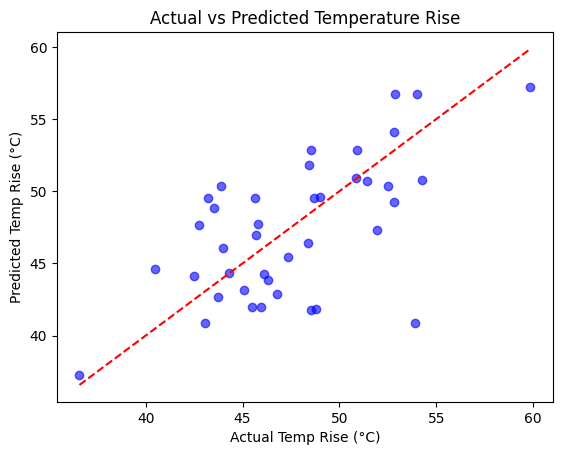


Predicted Temperature Rise for new data using decision tree model: 53.196392110977506 °C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (                               #true value finding formula
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)

df = pd.DataFrame({
    "Voltage": voltage,         #features
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise        #output y
})

print(df.head())    #prints first 5 lines of dataframe

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #20% data in test set

#---------------------------------
#Step 3: Decsion tree regressor
#---------------------------------
dt_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeRegressor(random_state=42))
])
#---------------------------
#step 4:Predictions ans evaluations
#---------------------------
dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("📊 Decision Tree Performance")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Actual vs Predicted Temperature Rise")
plt.show()

# ---------------------------
# Step 6: Predict for New Data    test data?
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})
predicted_temp = dt_pipe.predict(new_data)
print("\nPredicted Temperature Rise for new data using decision tree model:", predicted_temp[0], "°C")
